In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common imports
import os

import recipe_helper
%aimport recipe_helper

import svm_helper
%aimport svm_helper

import transform_helper
%aimport transform_helper


In [4]:
# Create plots to include in other slides
rh_ch = recipe_helper.Charts_Helper(visible=False)
_= rh_ch.create_data()
_= rh_ch.create_fit()
 

# Overview

This is the "trailer" for the course: a brief plot summary and introduction to the key characters
you will encounter.

## Goals
- Get a high level view of Machine Learning
- Introduce notation
- Preview concepts


# Process for Machine Learning

Our belief is that Machine Learning should be taught as a *process* for problem solving.

The following picture will be our agenda; each column is one step in the process.

<img src=images/W1_L3_S4_ML_Process.png>

In contrast, many approaches focus on a few steps under "Train a model"
- Select a model
- Fit

At two extremes, these approaches either focus on "using an API" or deep math.

This may lead to the ability to construct models but, in our opinion, what distinguishes an adequate Data Scientist from a good one are all the other steps in the process.

To be sure, this course will both teach you how to use an API for Machine Learning and contain a fair amount of math.

But we take an engineer/scientist approach and focus on insight and repeatability (hence, process)
- we view Data Science as an experimental science
- your experiments are implemented via code
- you need to understand enough math to diagnose problems and improve experiments


So *expect to do a lot of coding*.
- You don't need to be a "professional" programmer
- But you do need to be a *disciplined* programmer to ease repeatability
    - Subprograms/classes (methods) versus cut and paste
    
Also expect some math
- in order to understand why a model is appropriate or not, and to diagnose why it is not working
- **not** to be able to derive formulas

# Classical ML and Deep Learning

There are two main streams in this course
- "Classical ML"
    - somewhat long history
    - somewhat related to Statistics
- "Deep Learning"
    - really took off after 2010
    - more related to Artificial Intelligence than Statistics
        - experimental versus mathematical
        
This preview is for Classical Machine Learning.

# The big picture
<img src=images/W1_L3_S9_Big_picture_ML_taxonomy.png>

# Supervised Learning

Supervised learning is about *informed prediction*.

Let's parse these word
- prediction
- informed

<table>
    <tr>
        <center><strong>Prediction: what digits do these pixels represent ?</strong></center>
    </tr>
<img src=images/mnist_small_test.png>
</table>

**Prediction**:
Given an image that we haven't seem before, determine which digit it represents.

More formally:
- A single input $\x$ is a vector of length $n$, i.e., a collection of $n$ *features*.

- A **predictor** is a map from $\x$ to a class (label) $\hat{\y}$.

The previously unseen image: $\x$ consists of $n=64$ pixels (arranged as an $8 \times 8$ grid).

$\hat{\y}$ is the digit that we will say the image represents.

For now: 
- a class is drawn from a finite set $C$ of potential classes.
- we are describing Classification -- mapping $\x$ to a single class.
- we will extend to Regression: outputs are from a continuous universe (e.g., numbers)

An example is a pair $(\x, c)$ of a feature vector $\x$ and a class $c \in C$ (the target).

**Informed prediction** is when the probability of the predictor making a correct prediction
is greater than $\frac{1}{||C||}$.

- Consider a single example $(\x,c)$.

- A simple but naive predictor would map $\x$ to a random $c' \in C$.

The probability of the predictor being correct ($c' = c$) is
$\frac{1}{||C||}$ .



How do we achieve this ?

*Supervised Learning* makes the prediction based on having seen multiple, correctly labeled examples.
- It tries to *generalize*: find some pattern in the examples that is associated with the label.
- Perhaps the individual features (elements of $\x$) are associated with the correct class $c$.

- The aim of Supervised Learning is to create a function (predictor) that maps an $\x$ to the correct $c$.



# Notation

Let's review our [Notational standards](ML_Notation.ipynb)


# Making it concrete: Let's predict !

Let's load a dataset to make these concepts concrete

In [5]:
import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()
X_digits,  y_digits = clh.load_digits()


- Let's see what $m$ (number of examples), $n$ (number of features) are

In [6]:
import numpy as np

print("m={m:d} training examples".format(m=X_digits.shape[0]))
print("n={m:d} features per example".format(m=X_digits.shape[1]))
targets = np.unique(y_digits)
targets.sort()

print("{nc:d} classes: {c:s}".format(nc=len(targets), c=", ".join( [ str(t) for t in targets ]) ) )

m=1797 training examples
n=64 features per example
10 classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


In [7]:
# Across the features of all examples: what is the min and the max ?
# Let's look at the feature vector for example at index ex_num
ex_num = 0
print("\nExample {n:d}, range({mn:2.2f}, {mx:2.2f}):\n\t ".format(n=ex_num, 
                                                              mn=X_digits.min(), mx=X_digits.max()
                                                             ),
      X_digits[ex_num,:]
     ) 


Example 0, range(0.00, 1.00):
	  [0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]


- The dataset contains a number of examples.

    - Each example $\x^\ip$ is a vector of 64 features, which are numbers in the range $[0,1]$
    - The target $\y^\ip$ is a digit in the set $\{ 0, \ldots, 9 \}$
        - a *categorical* target, not continuous
        - Classification task, not Regression task

- In other words: the examples are encodings of images with labels that indicate what the image is.
    

Since the examples are grey scale values, we can re-arrange them into a square grid and plot:

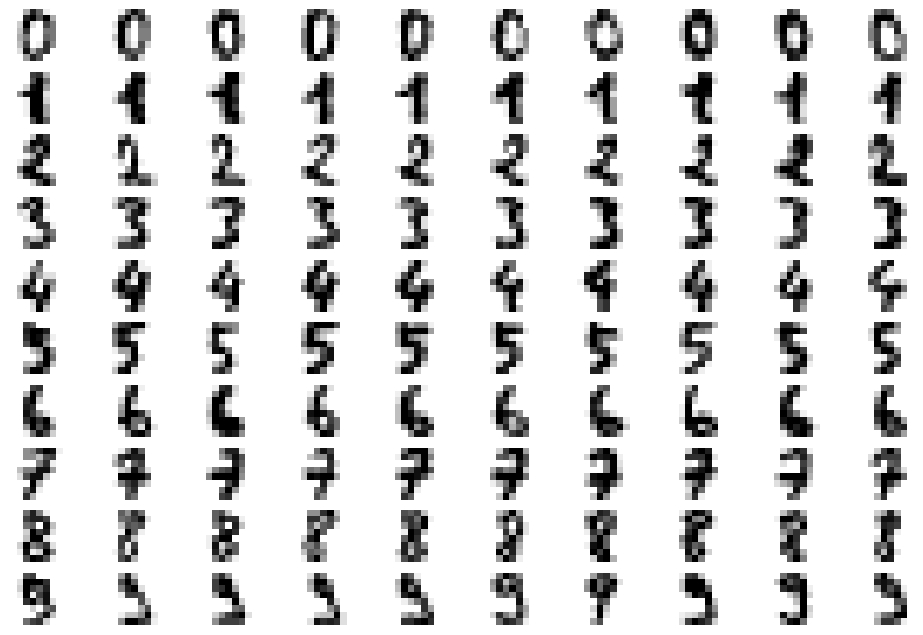

In [8]:
fig, axs = clh.plot_digits(X_digits,  y_digits)

- Our problem is to take an unknown $\x$ and map it (predict) to a label in the range $[0,9]$.

- This is a *classification* problem as our predictions are from a finite set.

KNN score: 0.990000
LogisticRegression score: 1.000000


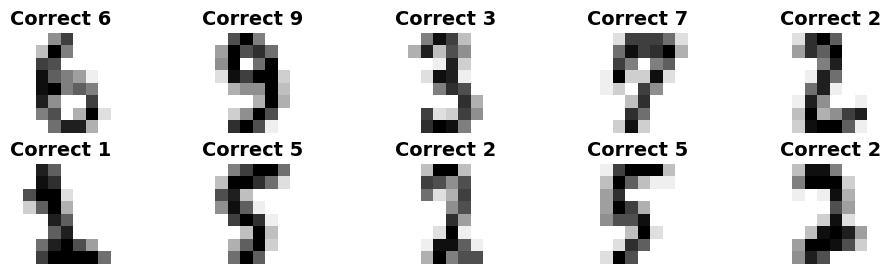

In [9]:
Xd_train, Xd_test, yd_train, yd_test, models = clh.fit_digits(X_digits, y_digits)

_= clh.predict_digits(models["knn"], Xd_test[:10], yd_test[:10])

- How would **you** predict a label for an image, given the 64 pixel values ?

- We will use a very simple (and inefficient) algorithm called *K Nearest Neighbors (KNN)*.

## Template matching

$\newcommand{\vc}{\mathbf{v}_{(c)}}$

- One approach to Classification is to match our input vector $\x$ against a *template*:
(a vector of similar length) whose class is known.

- With one template $\vc$ for each class $\c \in C$, we could classify $\x$ as being in the class $c'$
whose template was "closest" to $\x$.

- We need a similarity measure that maps $\x$ and $\vc$ to a number such that
larger means more similar.


# Our first predictor: K Nearest Neighbors (KNN)

K Nearest Neighbors (KNN) is one the simplest Machine Learning algorithms
- uses template matching.
- In this case, the templates are the feature vectors of the training set.

Given a text example with features $\x$, KNN makes prediction $\hat\y$ as follows
>Choose the label of the examples that most look like $\x$


$k$ is a hyper-parameter of our choosing (the "K" in "KNN")
- more on the choice in a minute

For $k = 1$
- we predict the value of the label of the training example $i$ most similar to $\x$

For $k \gt 1$
- using the $k$ training examples most similar to $\x$
- we predict the label $c$
    - that occurs with greatest frequency among the $k$ training examples most similar to $\x$



More formally
- Compute the similarity $s^\ip$ of test vector $\x$ to the features $\x^\ip$ of training example $i$, for each $i$
- Sort the examples in order of decreasing similarity to $\x$
    - let $S = [ i_1, \ldots, i_m ]$ be the indices of the training examples, ordered by decreasing similarity
    $$
    s^{i_j} \ge s^{i_{j +1}}
    $$
- Let $S_k = S_{0..k-1}$ be the first $k$ elements of $S$: 
    - the $k$ examples most similar to $\x$
- Let $\text{count}(c,k)$ be the number of examples with indices in $S_k$ that have label $c$
$$
    \text{count}(c,k) =  || \, \{ 1_{\y^{i_j} = c} \; | \:i_j \in S_k  \} \,||
$$
- Predict the label $\hat\y =c$ with highest $\text{count}(c,k)$
$$
\hat\y = \argmax{c}{ \text{count}(c,k)}
$$

<table>
    <tr>
        <th><center>KNN algorithm</center></th>
    </tr>
    <tr>
        <td><img src="images/W1_L3_S34_KNN_algo.png" width=1000</td>
    </tr>
</table>
​

## Choosing $k$

How do we choose $k$ ?

If $k$ is too small, our generalization (out of sample success) may suffer
- Consider $k=1$
- If the labels of the top 2 training examples most similar to test example $\x$ are very close
    - but different
- We choose the label of the top example
    - even though the minor difference in similarity measure may not significant
    
if $k$ is too large, we waste resources
- don't need to consider training examples that are very different from $\x$

We can motivate the choice of $k$ with a diagram.

Since it's hard to plot with many features $n$ and classes $C$, we simplify the plot
- $n=2$ features
- 2 class labels: $0$ and $1$

This allows us to create a 2D  plot where
- the feature vectors can be plotted as points in 2D
- colored according to label
- we can visualize the *decision boundary* that separates examples in the 2 classes

In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifiers =  [ ("knn (k=1)", KNeighborsClassifier(1)),
                 ("knn (k=3)", KNeighborsClassifier(5))
               ]
svmh = svm_helper.SVM_Helper()
_= svmh.create_kernel_data(classifiers=classifiers)      
fig, axs = svmh.plot_kernel_vs_transform(show_margins=False)
plt.close()

/home/kjp/Notebooks/NYU/class_helper.py:126: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  _= ax.scatter(X[y == j, 0], X[y == j, 1],
/home/kjp/Notebooks/NYU/class_helper.py:126: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  _= ax.scatter(X[y == j, 0], X[y == j, 1],


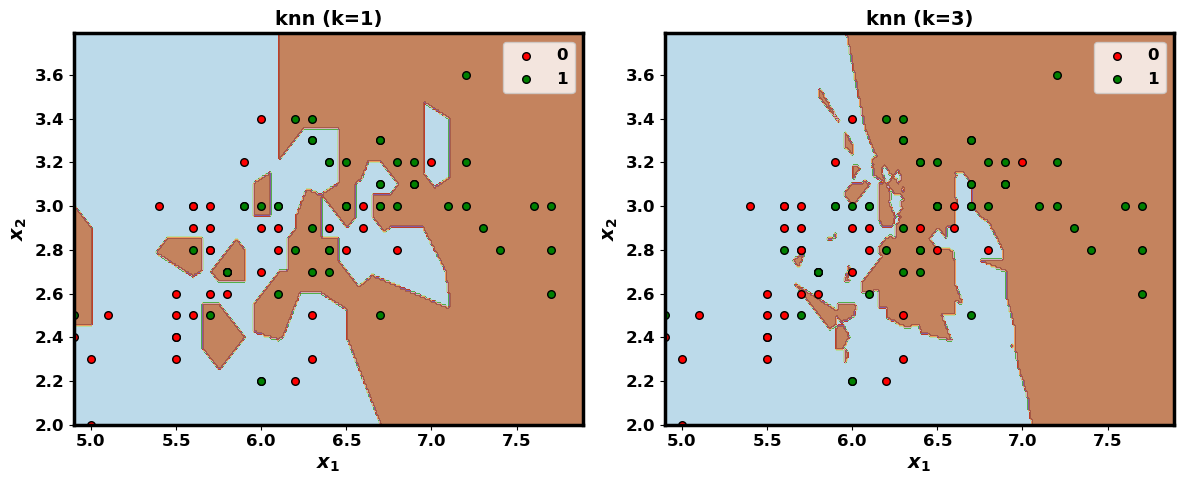

In [11]:
fig

From the diagram you can see that
-  the boundary between classes when $k=1$ is not smooth
    - indicative of poor generalization
    - a very small change in any feature in $\x$ can lead to a change in prediction
- with larger $k$, the separation boundary becomes smoother
    - perhaps yielding better generalization
    - less sensitive to minor change in feature values

## Hyper-parameters

$k$ is a *hyper-parameter*
- **not** part of the set of model parameters $\Theta$
- solved for in a manner *different* than solving for $\Theta$
    - the  "best" $\Theta$ is obtained as the result of a minimization problem that we will define
    - the "best" $k$ is found via search
        - part of the *Fine-tuning* step of the Recipe
        


## Draw-backs of KNN

Although simple, can you spot the drawback to KNN ?
- we compare test feature vector $\x$ to each training example
- thus, $\X$ must be available at test time
- the only values available at test time are the parameters $\Theta$
- therefore
$$
\Theta = \X
$$

The training examples must be stored as parameters for KNN.

The size of $\Theta$ (the number of parameters) is proportional to
- the size of the training set: $m * n$
- ideally: $m$ is very large, so $\Theta$ is big

The very nature of memorizing the training examples is the problem
- we find the surface level (syntactic) similarity
- rather than the deeper (semantic)similarity
    - a human "generalizes" that a 2D pixel grid with a strong vertical stripe in the center corresponds to label "1"
    - doesn't need to record every simple training example with that label
    - the generalization can be encoded with a number of parameters much smaller than $n$
    

When a model has too many parameters
- it can result in poor generalization
- prediction overly sensitive to minor surface level differences
- leads to the phenomenon known as *over-fitting*
    - performance out of sample (generalization) much worse than in sample (training examples)

**Note**

- *Always* count the number of parameters (size of $\Theta$)
- You may be surprised how many you are estimating in comparison to the amount of training data

  

## Summary 

KNN is so simple it's almost embarrassing to call it Machine Learning.
But it does illustrate the key steps
- the basis of Supervised Learning are training examples
    - the more the better
- the training examples are used to *fit* a predictor
    - we will learn many predictors (models) in this course
- the features of the examples are the key to prediction

KNN did not make intelligent use of the features: it merely  memorized the $m$ examples.

- That is, it used $m$ templates each of size $n$ so $|\Theta| = m*n$.

We will see more sophisticated models that
- use small templates $\Theta$
- that are the result of *solving* for $\Theta$ 
- through optimization
- rather than memorizing training examples

A necessary step (in Classical ML) for finding $\Theta$
- is proposing features that have predictive value
- these may not be the "raw" features
    - *synthetic* features that are the result of transforming the raw features
        - e.g., convert price to return

Finding features with predictive value can be facilitated by
- understanding the relationship between a feature and the target/label
- understanding the relationship between features

The Recipe for Machine Learning includes steps 
- that promote this understanding


# Summary

- Machine Learning is a *process* that involves multiple steps
    - It is *not* just learning to use various models (predictors)
    - We will emphasize the process as much as the algorithms
- Supervised Machine Learning depends on the availability of data
    - obtaining, cleaning, augmenting data is important
- An example is a collection of "features"
    - finding/creating/interpreting features is the key skill of a Data Scientist
        - which features are important 
        - how do features interact
    - sometimes features are missing or too low level
    - a key skill is creating features than enable learning
    ML


- A key part of Machine Learning is stating an optimization objective that captures your goal
    - not always obvious

<img src=images/W1_L3_S4_ML_Process.png>

In [12]:
print("Done")

Done
